In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

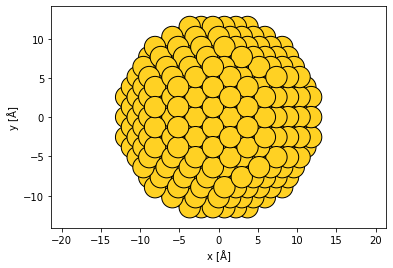

In [32]:
from ase.cluster.cubic import FaceCenteredCubic

surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
layers = [6, 9, 5]
lc = 3.61000
nanoparticle = FaceCenteredCubic('Au', surfaces, layers, latticeconstant=lc)

rotated_nanoparticle = nanoparticle.copy()
rotated_nanoparticle.rotate(45, "x")

y_angle = np.degrees(np.arctan(1 / np.sqrt(2)))

rotated_nanoparticle.rotate(y_angle, "y")

abtem.show_atoms(rotated_nanoparticle, scale=1);

In [33]:
centered_nanoparticle = rotated_nanoparticle.copy()

centered_nanoparticle.center(vacuum=2)

In [37]:
frozen_phonons = abtem.FrozenPhonons(centered_nanoparticle, 16, sigmas=0.1)

In [38]:
potential = abtem.Potential(
    frozen_phonons,
    sampling=0.05,
    projection="infinite",
    slice_thickness=1,
)

In [39]:
len(potential)

25

In [50]:
wave = abtem.PlaneWave(energy=300e3)

In [51]:
exit_wave = wave.multislice(potential)

In [52]:
exit_wave.compute()

[########################################] | 100% Completed | 4.10 ss


In [53]:
Cs = -8e-6 * 1e10  # spherical aberration (-8 um)

ctf = abtem.CTF(Cs=Cs, energy=wave.energy, defocus="scherzer", semiangle_cutoff=45)


print(f"defocus = {ctf.defocus:.2f} Å")

defocus = -48.61 Å


In [54]:
Cc = 1.0e-3 * 1e10  # chromatic aberration (1.2 mm)
energy_spread = 0.35  # standard deviation energy spread (0.35 eV)

focal_spread = Cc * energy_spread / exit_wave.energy

incoherent_ctf = ctf.copy()
incoherent_ctf.focal_spread = focal_spread

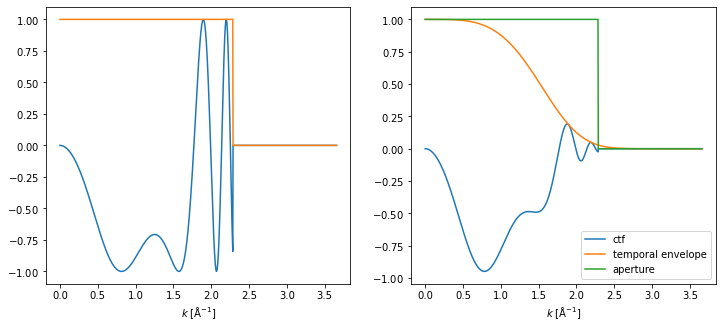

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ctf.profiles().show(ax=ax1)
incoherent_ctf.profiles().show(ax=ax2, legend=True);

In [56]:
measurement_ensemble = exit_wave.apply_ctf(incoherent_ctf).intensity()

measurement_ensemble.shape

(16, 552, 540)

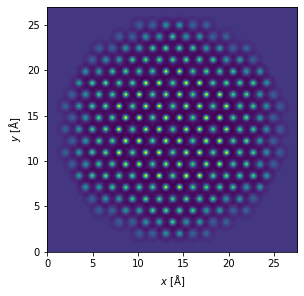

In [57]:
measurement = measurement_ensemble.mean(0)

measurement.show();

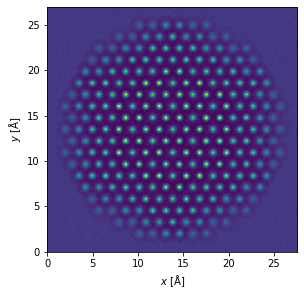

In [58]:
noisy_measurement = measurement.poisson_noise(dose_per_area=1e5)

noisy_measurement.show()